In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


<h1>Exploracion</h1>
<h5> explorare mis datos ya con la informacion transformada de la temporada de 2018 y lo que va de 2019</h5>

In [315]:
df=pd.read_csv('C:/Users/omarp/Downloads/entrenamiento_2018_2019.csv')
df.head()

,Equipo,Rival,Posicion,promedio_goles_0,promedio_tiros_0,promedio_tiros_acertados_0,promedio_goles_1,promedio_tiros_1,promedio_tiros_acertados_1,victorias,empates,derrotas,y,victorias_r,empates_r,derrotas_r,clus_equipo,clus_rival
0,Arsenal,Newcastle,V,2.00,14.50,7.50,2.00,17.00,6.75,2,0,2,1,0,1,3,5,3
1,Arsenal,Everton,L,2.50,15.25,7.25,1.75,13.75,5.25,3,0,1,1,1,2,1,5,2
2,Arsenal,Watford,L,2.50,13.75,7.00,1.00,10.00,4.00,4,0,0,1,2,1,1,5,2
3,Arsenal,Fulham,V,2.25,11.75,5.00,0.75,10.00,3.75,4,0,0,1,0,2,2,5,3
4,Arsenal,Leicester,L,2.75,9.75,4.00,0.50,11.75,4.00,4,0,0,1,2,0,2,5,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017781710>,
      dtype=object)

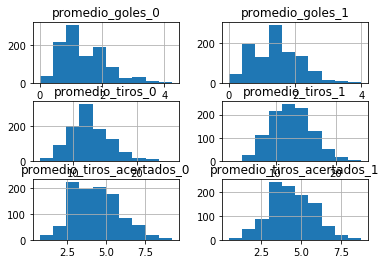

In [316]:
otras=[x for x in df.columns if x.endswith('_0') or x.endswith('_1')]
df[otras].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017EBBDA0>,
      dtype=object)

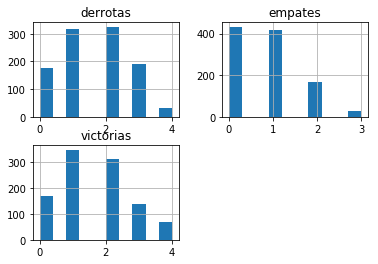

In [317]:
df[['victorias','empates','derrotas']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018094B70>,
      dtype=object)

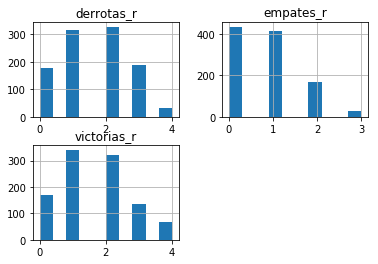

In [318]:
df[['victorias_r','empates_r','derrotas_r']].hist()

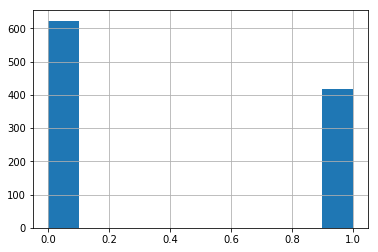

In [319]:
df['y'].hist()

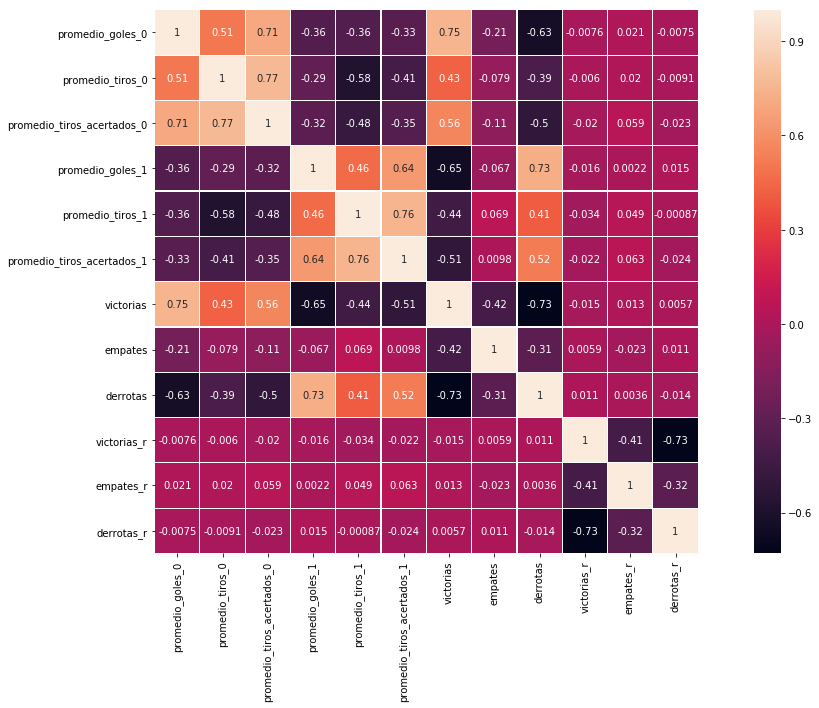

In [7]:
aux=[x for x in df.columns if x.startswith("promedio") or x.startswith("vic") or x.startswith("derr") or x.startswith("emp") ]
plt.figure(figsize = (20,10))
sns.heatmap(df[aux].corr(), square=True, annot=True,linewidths=.2)

<h5> al parcer hay ciertas correlaciones considerare para reducir la dimension simpre y cuanto se mantenga el nivel de predictividad cuando ya no esten</h5>

<h5> observo como se distribuye la varibale objetivo con respecto a cada variable<h5>

C:\Users\omarp\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


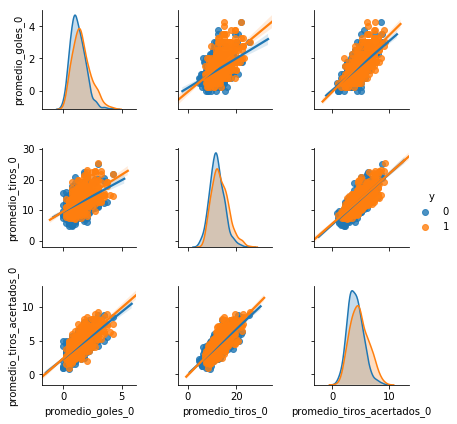

In [320]:
sns.pairplot(df, hue='y',size=2,vars=[x for x in df.columns if x.endswith('_0')],kind='reg')

C:\Users\omarp\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


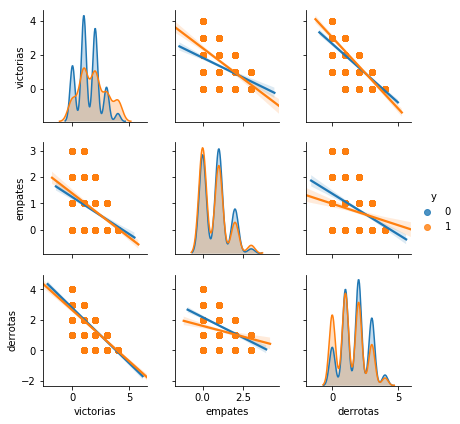

In [321]:
sns.pairplot(df, hue='y',size=2,vars=['victorias','empates','derrotas'],kind='reg')

<h1>PCA para visualizar mi problema</h1>

In [322]:
df_pca=pd.get_dummies(df,columns=['Posicion'])

In [323]:
df.columns

Index([u'Equipo', u'Rival', u'Posicion', u'promedio_goles_0',
       u'promedio_tiros_0', u'promedio_tiros_acertados_0', u'promedio_goles_1',
       u'promedio_tiros_1', u'promedio_tiros_acertados_1', u'victorias',
       u'empates', u'derrotas', u'y', u'victorias_r', u'empates_r',
       u'derrotas_r', u'clus_equipo', u'clus_rival'],
      dtype='object')

In [324]:
var_disc=[u'Equipo', u'Rival', u'Posicion']
var=['promedio_goles_0','promedio_goles_1','victorias','victorias_r','empates','empates_r']
var=['victorias','victorias_r','empates','empates_r']
var=[x for x in df.columns if x.endswith('_0') or x.endswith('_1') ]+['victorias','empates','derrotas']

In [325]:
X = df_pca.loc[:, var].values
y=df_pca['y'].copy()
scaler =StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X))

In [326]:
prin = ['prin'+str(comp) for comp in range(1,len(var)+1)]
pca = PCA()
pca.fit(Xs)
Xpca = pd.DataFrame(pca.transform(Xs), columns=prin)
Xpca.head()

,prin1,prin2,prin3,prin4,prin5,prin6,prin7,prin8,prin9
0,-0.016116,-2.613275,1.280800,1.586235,0.625674,0.363417,-0.711586,-0.314175,-1.193490e-15
1,1.766214,-2.164983,0.725328,1.358367,-0.066757,0.140794,-0.263684,-0.429923,-1.609823e-15
2,3.305446,-1.180330,-0.460119,1.052006,-0.289719,-0.251366,-0.566273,-0.674298,-9.992007e-16
3,2.685605,-0.461554,-1.560073,0.871799,-0.403669,-0.562844,-0.173989,-0.437206,-7.771561e-16
4,2.388321,-0.328992,-2.243848,1.606913,-0.718627,-0.494036,-0.046418,0.283099,-1.221245e-15


In [327]:
print pca.explained_variance_ratio_.cumsum()

[0.51847434 0.67649617 0.79095609 0.90343706 0.94326886 0.96475752
 0.98465829 1.         1.        ]


In [328]:
Xpca=Xpca.merge(y,left_index=True,right_index=True,how='inner')

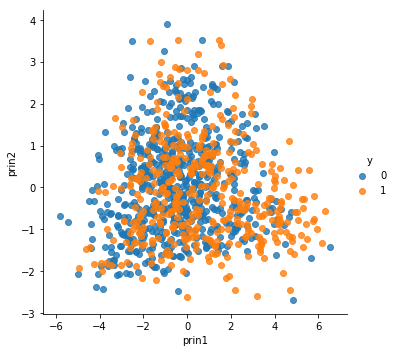

In [330]:
sns.lmplot('prin1','prin2',data=Xpca, fit_reg=False, hue='y')

In [331]:
def metricas(model,Xt,Xv,yt,yv):
    print "Accuracy_Train %.2f, Accuracy_Validate %.2f "%(accuracy_score(y_pred=model.predict(Xt),y_true=yt),accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print "ROC_Train %.2f, ROC_Validate %.2f "%(roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt),roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))

In [341]:
def Woe(lista,df):
    for j in lista:
        aux = df[[j,'y']].copy()
        aux['n'] = 1
        aux = aux.pivot_table(aggfunc='count',
                          columns='y',
                          fill_value=0,
                          index=j,
                          values='n')
        aux.reset_index(inplace=True)
        for i in range(2):
            aux[i]/=aux[i].sum()
            aux['W_'+str(j)] = np.log(aux[0]/aux[1])
        iv=(aux[0]-aux[1])*aux['W_'+str(j)]
        print('El IV de '+j+" es "+str(sum(iv)))
        aux.drop(range(2),axis=1,inplace=True)
        df = df.merge(aux,on=j,how='inner')
    return(df)

In [346]:
df=pd.read_csv('C:/Users/omarp/Downloads/entrenamiento_2018_2019.csv')


In [347]:
var=['victorias','victorias_r']
var=[x for x in df.columns if x.endswith('_0') or x.endswith('_1') or  x.endswith('_r') ]+['victorias','empates','derrotas']
var_disc=['Equipo','Rival','Posicion','clus_equipo','clus_rival']

In [348]:
for v in var:
    df[v]= pd.cut(df[v],bins=3).astype(str)
    aux = df[[v,'y']].copy()
    aux['n'] = 1
    aux = aux.pivot_table(aggfunc='count',
                          columns='y',
                          fill_value=0,
                          index=v,
                          values='n')
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/=aux[i].sum()

    aux['W_'+str(v)] = np.log(aux[0]/aux[1])
    iv=(aux[0]-aux[1])*aux['W_'+str(v)]
    print('El IV de '+v+" es "+str(sum(iv)))
    aux.drop(range(2),axis=1,inplace=True)   

El IV de promedio_goles_0 es 0.191512745275
El IV de promedio_tiros_0 es 0.132848803927
El IV de promedio_tiros_acertados_0 es 0.21502128613
El IV de promedio_goles_1 es 0.0341593433057
El IV de promedio_tiros_1 es 0.135642204758
El IV de promedio_tiros_acertados_1 es 0.0672523672012
El IV de victorias_r es 0.0949079244244
El IV de empates_r es 0.000496333457935
El IV de derrotas_r es 0.0609259297817
El IV de victorias es 0.127691017554
El IV de empates es 0.0228054399636
El IV de derrotas es 0.0741528055997


In [349]:
df=Woe(var_disc,df)

El IV de Equipo es 0.585933272176
El IV de Rival es 0.626059275016
El IV de Posicion es 0.0889755636885
El IV de clus_equipo es 0.445619586941
El IV de clus_rival es 0.37718289919


In [350]:
df=Woe(var,df)

El IV de promedio_goles_0 es 0.191512745275
El IV de promedio_tiros_0 es 0.132848803927
El IV de promedio_tiros_acertados_0 es 0.21502128613
El IV de promedio_goles_1 es 0.0341593433057
El IV de promedio_tiros_1 es 0.135642204758
El IV de promedio_tiros_acertados_1 es 0.0672523672012
El IV de victorias_r es 0.0949079244244
El IV de empates_r es 0.000496333457935
El IV de derrotas_r es 0.0609259297817
El IV de victorias es 0.127691017554
El IV de empates es 0.0228054399636
El IV de derrotas es 0.0741528055997


In [351]:
var_w=[x for x in df.columns if x.startswith('W')]

In [359]:
X = df[var_w]
y = df['y']
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)
model = LogisticRegression()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

Accuracy_Train 0.73, Accuracy_Validate 0.73 
ROC_Train 0.79, ROC_Validate 0.81 


<h1>Analisis</h1>
<li>Como podemos ver las variables promedio debido al criterio relacionado con el IV son muy predictivas pero analizando todas estan muy correlacionadas con el Numero de victorias y derrotas, por lo que despues de varias pruebas resulata lo mismo poner los promedios o los numeros, por lo que me quedare con los numeros.</li>
<li>Debido al punto anterior podemos ver que la variable numero de empates no esta relacionada pero por el IV resulta que no es un variable predictiva por lo que tambien la quitare.</li>
<li>Tambien hay correlacion entre el numero de victoria y derrotas del mismo equipo lo lo que solo se quedara las victorias</li>

In [360]:
df=pd.read_csv('C:/Users/omarp/Downloads/entrenamiento_2018_2019.csv')
var=['victorias','victorias_r']
var_disc=['Equipo','Rival','Posicion','clus_equipo','clus_rival']

<h5>como solo queda la variable victoria encontrare el mejor corte con arboles de descion</h5>

C:\Users\omarp\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


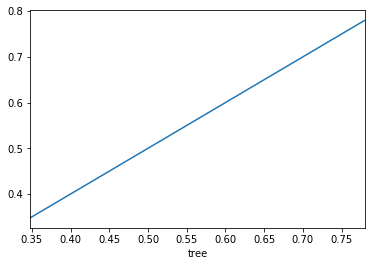

In [361]:
v=['victorias']
X=df[v].copy()
y=df['y'].copy()
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)
tree_model = DecisionTreeClassifier (max_depth = 2) 
tree_model.fit(Xt,yt)
Xt['tree'] = tree_model.predict_proba (Xt[v]) [: , 1]
Xt = Xt.merge(yt,left_index=True,right_index=True,how='inner')
Xt.groupby (['tree'])['y'].mean().plot()

Text(0,0.5,'superivisado')

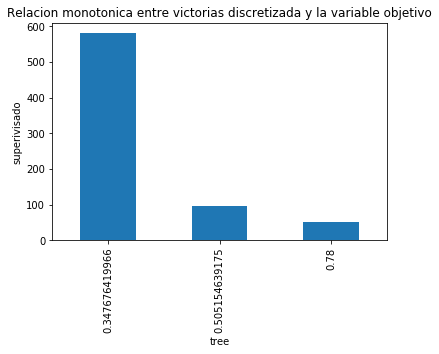

In [362]:
fig=Xt.groupby (['tree']) ['y'].count().plot.bar ()
fig.set_title('Relacion monotonica entre victorias discretizada y la variable objetivo')
fig.set_ylabel('superivisado')

In [363]:
cortes=pd.concat ([Xt.groupby (['tree'])[v].min (), Xt.groupby (['tree'])[v].max()],axis=1)
cortes.head()

,victorias,victorias
tree,,
0.347676,0,2
0.505155,3,3
0.780000,4,4


<h5>me di cuenta que el mejor corte era el de ver la variable como si fuera ya la separacion</h5>

In [364]:
score_ls = []     
score_std_ls = [] 
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, Xt[v],       
    yt, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.562509     0.010065
1      2      0.590051     0.028942
2      3      0.595085     0.024760
3      4      0.602146     0.030644


In [365]:
pd.cut(df['victorias'],bins=[0, 2,3, 4] ).astype(str)
v='victorias'
df[v]= pd.cut(df[v],bins=[0,1,2,3,4]).astype(str)
aux = df[[v,'y']].copy()
aux['n'] = 1
aux = aux.pivot_table(aggfunc='count',
                        columns='y',
                          fill_value=0,
                          index=v,
                          values='n')
aux.reset_index(inplace=True)
for i in range(2):
    aux[i]/=aux[i].sum()

aux['W_'+str(v)] = np.log(aux[0]/aux[1])
iv=(aux[0]-aux[1])*aux['W_'+str(v)]
print('Woe de '+v+" es "+str(sum(iv)))
aux.drop(range(2),axis=1,inplace=True) 

Woe de victorias es 0.192521910496


In [366]:
df=pd.read_csv('C:/Users/omarp/Downloads/entrenamiento_2018_2019.csv')
v=['victorias']
X=df[v].copy()
y=df['y'].copy()
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)
tree_model = DecisionTreeClassifier (max_depth = 4) 
tree_model.fit(Xt,yt)
Xt['tree'] = tree_model.predict_proba (Xt[v]) [: , 1]
Xt = Xt.merge(yt,left_index=True,right_index=True,how='inner')
cortes=pd.concat ([Xt.groupby (['tree'])[v].min (), Xt.groupby (['tree'])[v].max()],axis=1)
cortes.head()

C:\Users\omarp\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,victorias,victorias
tree,,
0.315789,0,0
0.362903,1,1
0.386792,2,2
0.495050,3,3
0.698113,4,4


In [367]:
df=pd.read_csv('C:/Users/omarp/Downloads/entrenamiento_2018_2019.csv')
var=['victorias','victorias_r']
var_disc=['Rival','Equipo','Posicion','clus_equipo','clus_rival']
var=var+var_disc
df=Woe(var,df)

El IV de victorias es 0.192521910496
El IV de victorias_r es 0.134797124964
El IV de Rival es 0.626059275016
El IV de Equipo es 0.585933272176
El IV de Posicion es 0.0889755636885
El IV de clus_equipo es 0.445619586941
El IV de clus_rival es 0.37718289919


In [368]:
var_w=[x for x in df.columns if x.startswith("W") ]
var_cont=[x for x in df.columns if x.endswith("_0") or x.endswith("_1")]

In [397]:
X = df[var_w]
y = df['y']
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)
model = LogisticRegression()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

Accuracy_Train 0.73, Accuracy_Validate 0.72 
ROC_Train 0.79, ROC_Validate 0.78 


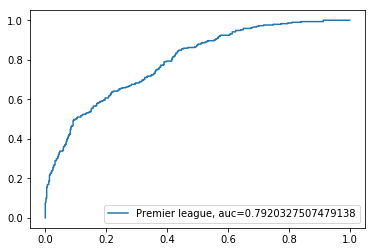

In [398]:
y_pred_proba = model.predict_proba(Xt)[:,1]
fpr, tpr, _ = metrics.roc_curve(yt,  y_pred_proba)
auc = metrics.roc_auc_score(yt, y_pred_proba)
plt.plot(fpr,tpr,label="Premier league, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [379]:
X.head()

,W_victorias,W_victorias_r,W_Rival,W_Equipo,W_Posicion,W_clus_equipo,W_clus_rival
0,0.100855,-0.413156,-0.091305,-0.169659,0.309079,-0.123829,-0.508706
1,0.100855,-0.413156,-1.580115,-0.169659,0.309079,-0.123829,-0.508706
2,-1.500073,-0.413156,-1.276929,-0.169659,0.309079,-0.123829,-0.508706
3,-1.500073,-0.413156,0.068543,-0.169659,0.309079,-0.123829,-0.508706
4,0.164935,-0.063983,0.068543,-0.169659,0.309079,-0.123829,-0.508706


<h5>aplique PCA a la variables con WOE para ver como se veia, se ve que intenta separar el problema</h5>

In [384]:
df_pca=df
X = df_pca.loc[:, var_w].values
y=df_pca['y'].copy()
scaler =StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X))

In [385]:
prin = ['prin'+str(comp) for comp in range(1,len(var)+1)]
pca = PCA()
pca.fit(Xs)
Xpca = pd.DataFrame(pca.transform(Xs), columns=prin)
Xpca.head()

,prin1,prin2,prin3,prin4,prin5,prin6,prin7
0,0.723007,-0.986634,1.012712,-0.330161,-0.527453,-0.446609,-0.066125
1,1.182396,-1.783751,0.961312,0.187533,-0.350708,0.626278,-0.044149
2,2.703137,-0.703281,1.095297,-0.998068,2.496626,0.450699,-0.040435
3,2.287977,0.017093,1.141748,-1.465920,2.336898,-0.518895,-0.060295
4,0.390946,-0.537417,0.963135,0.369517,-0.398392,-0.562412,-0.049881


In [386]:
print pca.explained_variance_ratio_.cumsum()
Xpca=Xpca.merge(y,left_index=True,right_index=True,how='inner')

[0.34244837 0.66685036 0.81014224 0.88675876 0.95796766 0.9814385
 1.        ]


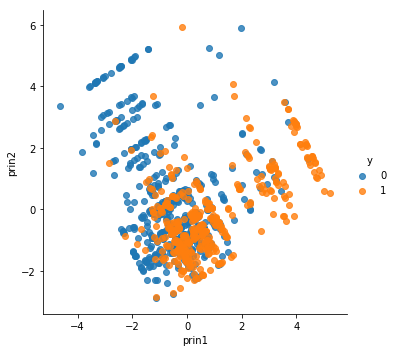

In [387]:
sns.lmplot('prin1','prin2',data=Xpca, fit_reg=False, hue='y')

<h1>Predicciones reales<h1>

In [443]:
df=pd.read_csv('C:/Users/omarp/Downloads/entrenamiento_2018_2019.csv')
df2=pd.read_csv('C:/Users/omarp/Downloads/primeras_ predicciones.csv')


In [444]:
def tabla_Woe(lista,df,df2):
    for j in lista:
        aux = df[[j,'y']].copy()
        aux['n'] = 1
        aux = aux.pivot_table(aggfunc='count',
                          columns='y',
                          fill_value=0,
                          index=j,
                          values='n')
        aux.reset_index(inplace=True)
        for i in range(2):
            aux[i]/=aux[i].sum()
            aux['W_'+str(j)] = np.log(aux[0]/aux[1])
        iv=(aux[0]-aux[1])*aux['W_'+str(j)]
        aux.drop(range(2),axis=1,inplace=True)
        df2=df2.merge(aux,on=j)
    return(df2)

In [445]:
df2=tabla_Woe(var,df,df2)

In [446]:
df=Woe(var,df)

El IV de victorias es 0.192521910496
El IV de victorias_r es 0.134797124964
El IV de Rival es 0.626059275016
El IV de Equipo es 0.585933272176
El IV de Posicion es 0.0889755636885
El IV de clus_equipo es 0.445619586941
El IV de clus_rival es 0.37718289919


In [447]:
var_w

['W_victorias',
 'W_victorias_r',
 'W_Rival',
 'W_Equipo',
 'W_Posicion',
 'W_clus_equipo',
 'W_clus_rival']

In [448]:
X = df[var_w]
y = df['y']
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [453]:
probablidades=model.predict_proba(df2[var_w])[:,1]
predicion=model.predict(df2[var_w])

In [454]:
df2['probas']=probablidades
df2['prediccion']=predicion

In [455]:
df2[['Equipo','Rival','Posicion','probas','prediccion']]

,Equipo,Rival,Posicion,probas,prediccion
0,Leicester,Chelsea,L,0.402928,0
1,Watford,Everton,L,0.395411,0
2,Everton,Watford,V,0.340110,0
3,Man City,Tottenham,V,0.726255,1
4,Chelsea,Leicester,V,0.417684,0
5,Tottenham,Man City,L,0.290585,0
6,West Ham,Liverpool,L,0.015900,0
7,Wolves,Liverpool,L,0.021059,0
8,Burnley,Arsenal,L,0.235652,0
9,Bournemouth,Aston Villa,L,0.515521,1
